<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%205/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Science Captone Project
## Introduction:
This project is the final project of the **IBM Data Science** course. 

All the major task of the Project will carry out and recorded in this notebook. It is the workplace for the whole project.
This is project will be share throughout the Github platform. 

## The first Task of the Project
1. Write some markdown to explain that this notebook will be mainly used for the capstone project.
2. Import the pandas library as pd.
3. Import the Numpy library as np.
4. Print the following the statement: Hello Capstone Project Course!

In [1]:
#*************** Setup the Project Enviroment *****************  

""" Install all necessary framework
    import all necessary component for the Project
"""
import pandas as pd
import numpy as np


In [2]:
#********** Main Code Body ****************

print("Hello Capstone Project Course!")

print(__name__)

Hello Capstone Project Course!
__main__


***

# Part 2 The Battle of Neighborhoods (Week 1)

# Open A New Restaurant in Auckland(NZ) 

## Introduction:

To avoid the worst-case scenario, the investor carry out an initial investigation is essential. This investigation has to be able to answer these questions; "Where should I open a new Restaurant? What kind of restaurant should I do?". However, it could be very clueless for the business investors to evaluate, especially those who had never worked in the catering industry. Therefore, most of the investors only depend on ideas from the business broker or the information provided by the other people in the food serveries sector. In most cases, the investor will end up without having a complete picture on their own. Hence, the business investment has become a gamble.

This project aims to use Data Science methodology and its tools to answer those questions raised above for the new investor in Auckland (New Zealand). This study will work on the data on the existing restaurants in terms of popularity in each suburb. Then, using those findings, cross-examine against restaurant data in Auckland. Hopefully, the outcome could find out the best kind of cuisine, which is likely successful in each suburb within the great Auckland region.


Finally, there will be a recommendation list of cuisine for the selected suburb, for example ponsonby.





### The methdologic

The methodologic of this study is using the most updated popularity ranking of the cuisine in whole Auckland Region as baseline, to detemint the what kind of cruisine was lacking in the desired region. First of all, the popularity of cuisine is positive correlated with the frequency of visit to the restaurant or the comments has been place to it. Because of that, the frequecny of comments that place to one type of restaurant could be treated as popularity. 

Moreover, the big Auckland's cuisine's popularity ranking was from develop from 303 suburbs in 7 local board. It should have be able represent the general taste of Aucklanders. Theis ranking shall be the baseline of the recommendation study. The popularity in each surburb will be different to the over ranking.

By comparing the ranking popularity of a suburb to the baseline ranking, it should be easier to determine what's the popular cuisine was missing in the suburb. The degree in different could also be caulated through analysis. 

***

### Data collection and Data Processing


The data is going to be used in this study including its usage is explained in detail as shown below:

1. Scrape demographics data of Auckland from Wikipedia.
   * "https://en.wikipedia.org/wiki/Demographics_of_Auckland # Demographics of Auckland"/n
   * "https://en.wikipedia.org/wiki/List_of_suburbs_of_Auckland  # List of Suburd Auckland"
   * Produce list of suburb in the each local board of Auckland.
   * Find coordination of suburb in the list.
   * Find demograhic infomation about each suburbs in terms of its population, ethnicity, and income etc.
   * Create dataframe for the suburb include the name, coordination, district and other factor mentioned above.
   
On the List of Suburbs of Auckland Wikipedia page, their table includes the name of the local board(Borough) and the suburb under each of the local boards. This name of suburbs could be scrape loaded into the table and use for getting the coordination from the Google Maps server. The Demographic of Auckland stores the demographic data which is from the Auckland Census Data(2018). These data include ethnicity and household income, which are perfect for relationship analysis between restaurants and suburbs.    

2. Use Existing in each suburb of Auckland. These kind of data will be found from the foursquare API. 
   
   * Preprocess the data about restrautant, record their suburb, name and rank.
   * Determind the number type of cuisine, and average the number of cuisine and the average score of it.
   * Rank the best most popular of cuisine and their charcteristic.
   
In this step, using the coordination of each suburb to find the restaurant in each suburb, and then find the top restaurant among them. There will be classification and analysation for the type of cuisine with the name of the restaurants. The outcome of the analysis should be the popularity of cuisine and the number of restaurants in each category. This information will determine which cuisine has more acceptance for Aucklanders. By comparison of the popularity of cuisine in high Auckland with the one each suburb, it is very likely to see what popular restaurant has reasonable successful in each suburb.

***








<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Step One  : Setup the Notebook enviroment</a></li>
        <li><a href="#ref2">Step Two  : Data Minning for Coordination</a></li>
        <li><a href="#ref3">Step Three: Data Mining from FourSquares</a></li>
        <li><a href="#ref4">Step Four : Dataset Handling</a></li>
        <li><a href="#ref5">Step Five : Explore Each Localboard in Auckland</a></li>
        <li><a href="#ref6">Step Six  : Recommandation List</a></li>
    </ol>
</div>
<br>
<hr>




<a id="ref1"></a>
## Step One: Setup the Notebook enviroment
Download and import the neccessory componets and library for project enviroment. 

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#********* Framework and Liberays *****************

#****** Install liberays
!pip install geocoder
!pip install geopy
!pip install geopandas
!pip install pgeocode #the google map decoder
!pip install matplotlib
!pip install tabula-py #pdf reader installer
# Installed liberay

#******** Data Handling **************
from bs4 import BeautifulSoup as soup # Beatifulsoup for Scraping
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#*** Data Analysis tool ********
# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style

import requests # library to handle requests
import time #for delays


import geocoder # import geocoder
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pgeocode as pgo



print("Workbench enviroment Ready !!!")

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

<a id="ref2"></a>
# Step Two: Data Minning for Coordination

### Data Minning for Suburb's Name

Scrape the webpage content of the website for furth process. The webpage content the list of suburbs in Big Auckland Region.  

In [5]:

#********* The Data Source URL ***********
# url_1 = "https://en.wikipedia.org/wiki/Demographics_of_Auckland" # Demographics of Auckland
url_2 = "https://en.wikipedia.org/wiki/List_of_suburbs_of_Auckland"  # List of Suburd Auckland 

# Download website content from the url_2 
url_2_content = requests.get(url_2).text

# Create Beatifulsoup object with the content of url_2

u2_soup = soup(url_2_content,"lxml") #the url_2 html code



### Data Extraction and Prepossing
Extract the name of the suburn on the website and create table for the name, the name of the local board. 

In [6]:
# Extracting the Name on the webpage, in column of Name, local board. 
u2_soup.ul.parent.li.text[2:6]
u2_table_content = {"suburb":[],"localboard":[]} #create a tempalte dictionary structure 

# The html code contain the required informaition
suburbs_container    = u2_soup.findAll('div',{'class':'div-col'}) #list of suburbs
localboard_container = u2_soup.findAll('span',{'class':'mw-headline'}) #list of localboard

#record the infroation into dictionary with the suburbs and its localboard
for i in range(len(suburbs_container)):
    for row in suburbs_container[i].findAll('li'):
        
        # append the suburb name into the dictionary
        u2_table_content["suburb"].append(row.text) 
        
        # append the suburb name into the dictionary
        u2_table_content["localboard"].append(localboard_container[i].text) 

# convert the dictionary into the panda dataframe
u2_dataframe = pd.DataFrame.from_dict(u2_table_content)

print('There are {} of Suburbs in the Big Auckland Region'.format(len(u2_dataframe)))
u2_dataframe # The list of the 


#****** Divide the data according to the suburbs **************
Auck_cent_df = u2_dataframe.loc[u2_dataframe['localboard']=='Auckland central']
Nort_shor_df = u2_dataframe.loc[u2_dataframe['localboard']=='North Shore']
sout_east_df = u2_dataframe.loc[u2_dataframe['localboard']=='South Auckland and eastern suburbs']
papakura_df  = u2_dataframe.loc[u2_dataframe['localboard']=='Papakura']
pukekohe_df  = u2_dataframe.loc[u2_dataframe['localboard']=='Pukekohe']
west_auck_df = u2_dataframe.loc[u2_dataframe['localboard']=='West Auckland']
rodney_df    = u2_dataframe.loc[u2_dataframe['localboard']=='Rodney']

# print("There are {} suburbs in Auckland Central".format(len(Auck_cent_df)))
# print(len(Nort_shor_df))
# print(sout_east_df)
# print(len(papakura_df))
# print(len(pukekohe_df))
# print(len(west_auck_df))
# print(len(rodney_df))

Auck_cent_df.head()
u2_dataframe.head()
auckland_subburb_group_count = u2_dataframe.groupby(['localboard']).count()
u2_dataframe.groupby(['localboard']).count()

There are 303 of Suburbs in the Big Auckland Region


,suburb
localboard,
Auckland central,65
North Shore,49
Papakura,13
Pukekohe,17
Rodney,61
South Auckland and eastern suburbs,62
West Auckland,36


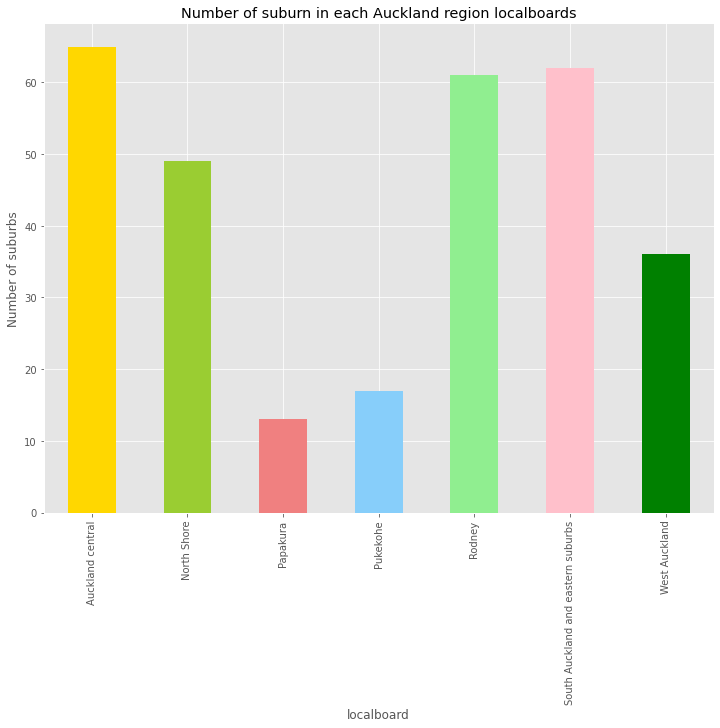

In [7]:
# Plot the suburb in each local board

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','green']

auckland_subburb_group_count['suburb'].plot(
                                kind = 'bar',
                                figsize = (12,9),
                                color = colors_list,
                                )
# scale the title up by 12% to match pctdistance
plt.title('Number of suburn in each Auckland region localboards', y=1) 


plt.ylabel('Number of suburbs') # add y-label to the plot

plt.show()


## Find the coordination


### Using Geopy

In [8]:
#create an list for Subur in Auckland centre coordination
sub_loc_ack = {'suburbs':[],'local board':[],'latitude':[],'longitude':[]}

locator = Nominatim(user_agent='myGeocoder') #the google operator

#Get the coordinator for each of the suburb
for row_sub, row_local in zip(u2_dataframe['suburb'], u2_dataframe['localboard']):
      
    #the API for getting the JSON files of the desired suburb
    sub_loc_1 = locator.geocode("{}, Auckland".format(row_sub))  
#     suburb_location.latitude
#     suburb_location.longitude
    if sub_loc_1 != None:
        #append the data into the new database
        sub_loc_ack['suburbs'].append(row_sub)
        sub_loc_ack['local board'].append(row_local)
    
        sub_loc_ack['latitude'].append(sub_loc_1.latitude)
        sub_loc_ack['longitude'].append(sub_loc_1.longitude)
    
        print('The {} is {}'.format(row_sub, sub_loc_1.latitude))

The Arch Hill is -36.8660924
The Auckland CBD is -36.848911
The Avondale is -36.8930582
The Blockhouse Bay is -36.9197769
The Balmoral is -36.8892046
The Blackpool is -36.7889046
The Eden Terrace is -36.8652491
The Eden Valley is -36.8767143
The Ellerslie is -36.897603
The Epsom is -36.8858447
The Freemans Bay is -36.8535101
The Glendowie is -36.8581662
The Glen Innes is -36.8778879
The Grafton is -36.8622777
The Greenlane is -36.893759
The Greenwoods Corner is -36.899715549999996
The Grey Lynn is -36.859922
The Herne Bay is -36.8425074
The Hillsborough is -36.9221753
The Kingsland is -36.871195
The Kohimarama is -36.8545594
The Lynfield is -36.9273727
The Meadowbank is -36.8702538
The Mission Bay is -36.848267
The Morningside is -36.8774397
The Mount Albert is -36.8859912
The Mount Eden is -36.8836944
The Mount Roskill is -36.9031433
The Mount Wellington is -36.9047927
The Newmarket is -36.8683745
The Newton is -36.8625986
The New Windsor is -36.9062704
The Onehunga is -36.9237924
The

In [9]:
#***** Convert the list of coordination to panda dataframe --- big auckland dataframe
big_auckland_df = pd.DataFrame.from_dict(sub_loc_ack)
print(len(big_auckland_df))
big_auckland_df.head()

big_auckland_df.to_csv('big_auckland_df.csv',index = False)
big_auckland_df.groupby(['local board']).count()



300


,suburbs,latitude,longitude
local board,,,
Auckland central,65,65,65
North Shore,49,49,49
Papakura,13,13,13
Pukekohe,17,17,17
Rodney,60,60,60
South Auckland and eastern suburbs,60,60,60
West Auckland,36,36,36


<a id = 'ref3'></a>
---
# Step three: Data Mining from FourSquares

In this section, all the coordination of the suburb found in the previous step will be used for discover the venues in each suburbs. 


### Creating a tools to explore venues around multiple location:

In [10]:
#Creat Class for exploring nearby Venues

class Venues_Exploring:
    def __init__(self, names, latitudes, longitudes,C_ID,C_SEC): 
        self.names = names
        self.latitudes = latitudes
        self.longitudes = longitudes
        self.C_ID = C_ID
        self.C_SEC = C_SEC
        
#         #the private variable of the instance
#         VERSION = '20180605' # Foursquare API version
#         LIMIT = 100 # A default Foursquare API limit value
#         radius = 1000 #venue within the radius of 500m
#         venues_temp_list=[]
    
    def getNearbyVenues(self):        
        
        #the private variable of the instance
        VERSION = '20180605' # Foursquare API version
        LIMIT = 100 # A default Foursquare API limit value
        radius = 1000 #venue within the radius of 500m
        venues_temp_list=[]
    
        for name, lat, lng in zip(self.names, self.latitudes, self.longitudes):
            print(name)
            
            # create the API request URL
        
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                self.C_ID, 
                self.C_SEC, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_temp_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        venues_returned = pd.DataFrame([item for venues_temp_list in venues_temp_list for item in venues_temp_list])
        venues_returned.columns = ['suburbs', 
                    'suburbs Latitude', 
                    'suburbs Longitude', 
                    'Venue', 
                    'Venue Latitude', 
                    'Venue Longitude', 
                    'Venue Category']
    
        return(venues_returned)

## Exploring the whole Auckland Region

### Working out the baseline

Finding the recommended type of restuarant is the purpose of this project. To do that, we neeed to have a baseline for compareson. The general taste of Aucklander will be perfect as baseline. With help of the four square service, the general acceptant could be identify by exploring the popularity of the crusine within big auckland region.

In [11]:
#find the coordination of big Aukcland region.
address = 'Auckland'

geolocator = Nominatim(user_agent="Auckland")
location_auck = geolocator.geocode(address)
latitude_auck = location_auck.latitude
longitude_auck = location_auck.longitude
print('The geograpical coordinates of Auckland are {}, {}.'.format(latitude_auck, longitude_auck))

The geograpical coordinates of Auckland are -36.852095, 174.7631803.


In [12]:
#Creat a map of Auckland with the coordination from above process

map_auckland = folium.Map([latitude_auck, longitude_auck], zoom_start=9)

# add markers to map
for lat, lng, localb, neighborhood in zip(big_auckland_df['latitude'], big_auckland_df['longitude'], big_auckland_df['local board'], big_auckland_df['suburbs']):
    label = '{}, {}'.format(neighborhood, localb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        parse_html=False).add_to(map_auckland)  
    
map_auckland
   

In [13]:
big_auckland_df.groupby(['local board']).count()

,suburbs,latitude,longitude
local board,,,
Auckland central,65,65,65
North Shore,49,49,49
Papakura,13,13,13
Pukekohe,17,17,17
Rodney,60,60,60
South Auckland and eastern suburbs,60,60,60
West Auckland,36,36,36


In [14]:
#predefined the variables for Auckland
# template data
name_temp = big_auckland_df['suburbs'] 
lati_temp= big_auckland_df['latitude']
lngi_temp = big_auckland_df['longitude']
C_ID = CLIENT_ID
C_SEC = CLIENT_SECRET

#create a class object downtown_venue
auckland_venues = Venues_Exploring(name_temp,
                        lati_temp,
                        lngi_temp,
                        C_ID,
                        C_SEC
                       )



In [15]:
auck_venues_df = auckland_venues.getNearbyVenues() #creat auckland venues dataframe

Arch Hill
Auckland CBD
Avondale
Blockhouse Bay
Balmoral
Blackpool
Eden Terrace
Eden Valley
Ellerslie
Epsom
Freemans Bay
Glendowie
Glen Innes
Grafton
Greenlane
Greenwoods Corner
Grey Lynn
Herne Bay
Hillsborough
Kingsland
Kohimarama
Lynfield
Meadowbank
Mission Bay
Morningside
Mount Albert
Mount Eden
Mount Roskill
Mount Wellington
Newmarket
Newton
New Windsor
Onehunga
Oneroa
Onetangi
One Tree Hill
Orakei
Oranga
Ostend
Ōtāhuhu
Owairaka
Palm Beach
Panmure
Parnell
Penrose
Point England
Point Chevalier
Ponsonby
Remuera
Royal Oak
Saint Heliers
St Johns
Saint Marys Bay
Sandringham
Stonefields
Surfdale
Tamaki
Te Papapa
Three Kings
Waikowhai
Wai o Taiki Bay
Waterview
Western Springs
Westfield
Westmere
Albany
Bayswater
Bayview
Beach Haven
Belmont
Birkdale
Birkenhead
Browns Bay
Campbells Bay
Castor Bay
Chatswood
Cheltenham
Crown Hill
Devonport
Fairview Heights
Forrest Hill
Glenfield
Greenhithe
Hauraki
Highbury
Hillcrest
Long Bay
Mairangi Bay
Marlborough
Milford
Murrays Bay
Narrow Neck
Northcote
Nor

In [16]:
print('The size of the table',auck_venues_df.shape)
auck_venues_df.to_csv('auck_venues_df.csv',index = False)
auck_venues_df.head()



The size of the table (3879, 7)


,suburbs,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arch Hill,-36.866092,174.745972,Grey Lynn Park,-36.861524,174.743148,Park
1,Arch Hill,-36.866092,174.745972,Philippes Chocolat,-36.865305,174.744822,Bakery
2,Arch Hill,-36.866092,174.745972,Garage Project Kingsland Cellar Door,-36.869393,174.749343,Brewery
3,Arch Hill,-36.866092,174.745972,The Baker's Cottage,-36.870296,174.748466,Bakery
4,Arch Hill,-36.866092,174.745972,Taiko,-36.872235,174.744668,Japanese Restaurant


### Number of Venues are in each Neighborhood within the Downtown

In [17]:
auck_venues_df.groupby('suburbs').count()



,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
suburbs,,,,,,
Airport Oaks,6,6,6,6,6,6
Albany,44,44,44,44,44,44
Algies Bay,5,5,5,5,5,5
Anawhata,4,4,4,4,4,4
Ararimu,2,2,2,2,2,2
Arch Hill,77,77,77,77,77,77
Ardmore,4,4,4,4,4,4
Arkles Bay,9,9,9,9,9,9
Army Bay,5,5,5,5,5,5


<a id = 'ref4'><a id="ref1"></a>
    
# Step Three: Dataset Handling

## Data Tiddy up

### Delete Venues that is not a resturant

In [18]:
#*********** Delete Unwanted type of venues in category
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Park')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Beach')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Grocery Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Gym')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Convenience Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Hotel')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Trail')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Pharmacy')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Campground')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Pet Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Paper / Office Supplies Store ')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Shopping Mall')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Theater')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Motel')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Mountain')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Train Station')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Fruit & Vegetable Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Harbor / Marina')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Paper / Office Supplies Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Tunnel')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Gym / Fitness Center')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Paper / Office Supplies Store')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Tennis Court')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Rental Car Location')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Bus Stop')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Athletics & Sports')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Gift Shop')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Flower Shop')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Nature Preserve')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Neighborhood')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Night Market')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Art Gallery')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Supermarket')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Business Service')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Construction & Landscaping')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Garden Center')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Music Venue')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Airport')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'ATM')],axis=0,inplace=True)
auck_venues_df.drop(auck_venues_df.index[(auck_venues_df["Venue Category"] == 'Airport Terminal')],axis=0,inplace=True)


#*******************************

print("There are {} rows after the processing ".format(len(auck_venues_df)))
auck_venues_df.head()

There are 2969 rows after the processing 


,suburbs,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arch Hill,-36.866092,174.745972,Philippes Chocolat,-36.865305,174.744822,Bakery
2,Arch Hill,-36.866092,174.745972,Garage Project Kingsland Cellar Door,-36.869393,174.749343,Brewery
3,Arch Hill,-36.866092,174.745972,The Baker's Cottage,-36.870296,174.748466,Bakery
4,Arch Hill,-36.866092,174.745972,Taiko,-36.872235,174.744668,Japanese Restaurant
5,Arch Hill,-36.866092,174.745972,Crumb,-36.862473,174.745015,Café


### Add Localboard into the 

In [19]:
#Add the column Localboard into the auck_venues_df table
temp_df3 = pd.merge(auck_venues_df,big_auckland_df[['suburbs', 'local board']], on=["suburbs","suburbs"])
print(temp_df3.groupby(['local board']).count())
tmep_df3 = temp_df3.sort_values(by = "local board")
sorted_auck_venues = tmep_df3.reset_index(drop=True)
print('There are {} row in the dataframe.'.format(len(sorted_auck_venues)))

sorted_auck_venues.head()

                                    suburbs  suburbs Latitude  \
local board                                                     
Auckland central                       1681              1681   
North Shore                             507               507   
Papakura                                 42                42   
Pukekohe                                 29                29   
Rodney                                  134               134   
South Auckland and eastern suburbs      386               386   
West Auckland                           190               190   

                                    suburbs Longitude  Venue  Venue Latitude  \
local board                                                                    
Auckland central                                 1681   1681            1681   
North Shore                                       507    507             507   
Papakura                                           42     42              42   
Pukekohe      

,suburbs,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,local board
0,Arch Hill,-36.866092,174.745972,Philippes Chocolat,-36.865305,174.744822,Bakery,Auckland central
1,Oneroa,-36.780169,175.015130,Vino Vino,-36.782640,175.010152,Mediterranean Restaurant,Auckland central
2,Oneroa,-36.780169,175.015130,Delight Café,-36.781282,175.008834,Café,Auckland central
3,Oneroa,-36.780169,175.015130,Fenice,-36.782729,175.009699,Italian Restaurant,Auckland central
4,Oneroa,-36.780169,175.015130,Cove,-36.782454,175.009815,Brewery,Auckland central


### Find duplication and delete the duplication the dataset.

In [20]:
#find duplication
df = sorted_auck_venues[sorted_auck_venues.duplicated(subset = ['Venue'],keep=False)].sort_values(by = 'Venue')
print("There are {} Duplication" .format(df.shape[0]))
#purify the dataset

auck_venue_df_pured = sorted_auck_venues.drop_duplicates(subset = ["Venue"])
print("There are {} venues after house cleaning" .format(auck_venue_df_pured.shape[0]))
auck_venue_df_pured.head()

There are 1768 Duplication
There are 1796 venues after house cleaning


,suburbs,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,local board
0,Arch Hill,-36.866092,174.745972,Philippes Chocolat,-36.865305,174.744822,Bakery,Auckland central
1,Oneroa,-36.780169,175.015130,Vino Vino,-36.782640,175.010152,Mediterranean Restaurant,Auckland central
2,Oneroa,-36.780169,175.015130,Delight Café,-36.781282,175.008834,Café,Auckland central
3,Oneroa,-36.780169,175.015130,Fenice,-36.782729,175.009699,Italian Restaurant,Auckland central
4,Oneroa,-36.780169,175.015130,Cove,-36.782454,175.009815,Brewery,Auckland central


### The number of types of venues in Auckland Region

In [21]:
# auck_venues_df.groupby(['suburbs']).count() 
print('There are {} uniques categories of Venues.'.format(len(auck_venue_df_pured['Venue Category'].unique())))

There are 252 uniques categories of Venues.


In [22]:
# one hot encoding, dt_ohe means downtown_one_hot_encoding
auck_venue_df_pured_ohe = pd.get_dummies(auck_venue_df_pured[['Venue Category']], prefix="", prefix_sep="")

# print(dt_ohe)
# add neighborhood column back to dataframe
auck_venue_df_pured_ohe['suburbs'] = auck_venue_df_pured['suburbs'] 

# move neighborhood column to the first column
fixed_columns = [auck_venue_df_pured_ohe.columns[-1]] + list(auck_venue_df_pured_ohe.columns[:-1])
auck_venue_df_pured_ohe = auck_venue_df_pured_ohe[fixed_columns]

print(auck_venue_df_pured_ohe.shape)
auck_venue_df_pured_ohe.head()

(1796, 253)


,suburbs,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat Launch,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Coworking Space,Cupcake Shop,Dairy Store,Dam,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Gym Pool,Gymnastics Gym,Health & Beauty Service,Heliport,History Museum,Hobby Shop,Hockey Field,Home Service,Hostel,Hot Spring,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Performing Arts Venue,Persian Restaurant,Photography Lab,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Service,Resort,Restaurant,River,Rock Climbing Spot,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Summer Camp,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theme Park,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Arch Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
# #***** Test: Ponsonby venues *******
user_venus_copy = auck_venue_df_pured_ohe.copy()
test_df = auck_venue_df_pured_ohe.groupby('suburbs').get_group('Ponsonby').copy()
test_df.head()

,suburbs,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat Launch,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Coworking Space,Cupcake Shop,Dairy Store,Dam,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Gym Pool,Gymnastics Gym,Health & Beauty Service,Heliport,History Museum,Hobby Shop,Hockey Field,Home Service,Hostel,Hot Spring,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Performing Arts Venue,Persian Restaurant,Photography Lab,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Service,Resort,Restaurant,River,Rock Climbing Spot,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Summer Camp,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theme Park,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
631,Ponsonby,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

***Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category***

In [24]:
auck_venues_grouped = auck_venue_df_pured_ohe.mean().reset_index()
print('size of data',auck_venues_grouped.shape)
auck_venues_grouped.head() #downtown venues grouped

size of data (252, 2)


,index,0
0,African Restaurant,0.001114
1,American Restaurant,0.002784
2,Antique Shop,0.001670
3,Argentinian Restaurant,0.000557
4,Arts & Crafts Store,0.001670


In [25]:
auck_venues_grouped = auck_venue_df_pured_ohe.mean().reset_index()
print('size of data',auck_venues_grouped.shape)
auck_venues_grouped.head() #downtown venues grouped

size of data (252, 2)


,index,0
0,African Restaurant,0.001114
1,American Restaurant,0.002784
2,Antique Shop,0.001670
3,Argentinian Restaurant,0.000557
4,Arts & Crafts Store,0.001670


In [26]:
auck_local_grouped = auck_venue_df_pured_ohe.groupby('suburbs').mean().reset_index()
print('size of data',auck_local_grouped.shape)
auck_local_grouped.head() #downtown venues grouped

size of data (250, 253)


,suburbs,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat Launch,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Coworking Space,Cupcake Shop,Dairy Store,Dam,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Gym Pool,Gymnastics Gym,Health & Beauty Service,Heliport,History Museum,Hobby Shop,Hockey Field,Home Service,Hostel,Hot Spring,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Performing Arts Venue,Persian Restaurant,Photography Lab,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Service,Resort,Restaurant,River,Rock Climbing Spot,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Summer Camp,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theme Park,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Airport Oaks,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Top 10 most common venues in Auckland

In [27]:
#*********** Top 10 Venues for Auckland

Auck_top_venues = 10

# for sub in auck_venues_grouped['Neighborhood']:
print("----"+'Auckland' +"----")
temp_1 = auck_venues_grouped

temp_1.columns = ['venue','freq']
temp_1 = temp_1.iloc[0:]
temp_1['freq'] = temp_1['freq'].astype(float)
temp_1 = temp_1.round({'freq': 3})
#***** Test
#*** This is copy of the completed ranking of the Auckland Venues
Auckland_venues_ranking_fulllist = temp_1.copy()
#********
print(Auckland_venues_ranking_fulllist.shape)
# print(temp_1.sort_values('freq', ascending=False).reset_index(drop=True).head(Auck_top_venues))
print('\n')

auck_top_10 = temp_1.sort_values('freq', ascending=False).reset_index(drop=True).head(Auck_top_venues)

auck_top_10

----Auckland----
(252, 2)




,venue,freq
0,Café,0.202
1,Chinese Restaurant,0.038
2,Bar,0.033
3,Thai Restaurant,0.028
4,Restaurant,0.027
5,Japanese Restaurant,0.027
6,Indian Restaurant,0.027
7,Bakery,0.024
8,Coffee Shop,0.022
9,Fish & Chips Shop,0.018


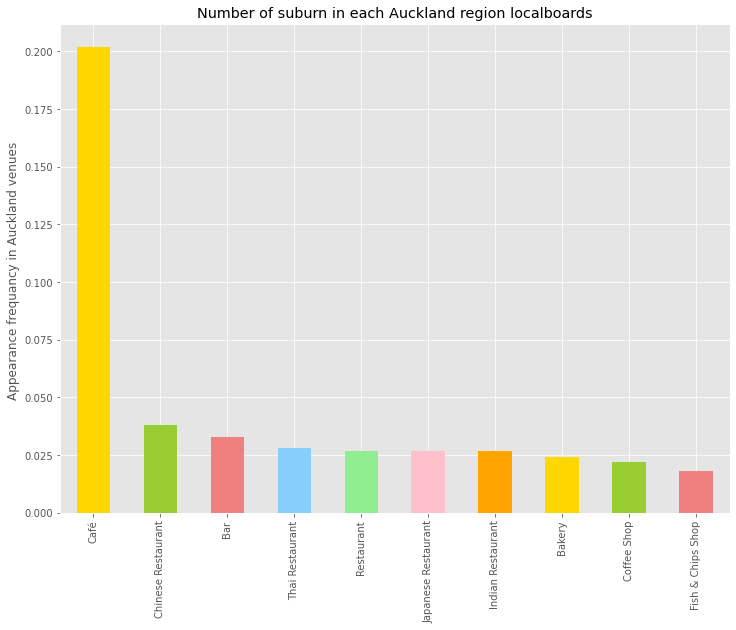

In [28]:
x = auck_top_10.index
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange']
auck_top_10['freq'].plot(kind = 'bar',
                         figsize = (12,9),
                         color = color_list
                        )
# scale the title up by 12% to match pctdistance
plt.title('Number of suburn in each Auckland region localboards', y=1) 


plt.ylabel('Appearance frequancy in Auckland venues ') # add y-label to the plot
plt.xticks(x,auck_top_10['venue'])
plt.show()

<a id = 'ref5'></a>

# Explore Each Localboard in Auckland

In [29]:
auck_venue_df_pured.groupby('local board').count()

,suburbs,suburbs Latitude,suburbs Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
local board,,,,,,,
Auckland central,988,988,988,988,988,988,988
North Shore,336,336,336,336,336,336,336
Papakura,24,24,24,24,24,24,24
Pukekohe,24,24,24,24,24,24,24
Rodney,111,111,111,111,111,111,111
South Auckland and eastern suburbs,187,187,187,187,187,187,187
West Auckland,126,126,126,126,126,126,126


## One hot encoding for all the Localboard

In [30]:
# one hot encoding, dt_ohe means downtown_one_hot_encoding
loc_brd_ohe = pd.get_dummies(auck_venue_df_pured[['Venue Category']], prefix="", prefix_sep="")

# print(dt_ohe)
# add neighborhood column back to dataframe
loc_brd_ohe['local board'] = auck_venue_df_pured['local board'] 

# move neighborhood column to the first column
lb_fixed_columns = [loc_brd_ohe.columns[-1]] + list(loc_brd_ohe.columns[:-1])
loc_brd_ohe = loc_brd_ohe[lb_fixed_columns]

print(loc_brd_ohe.shape)
loc_brd_ohe.head()

(1796, 253)


,local board,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat Launch,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Coworking Space,Cupcake Shop,Dairy Store,Dam,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Gym Pool,Gymnastics Gym,Health & Beauty Service,Heliport,History Museum,Hobby Shop,Hockey Field,Home Service,Hostel,Hot Spring,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Performing Arts Venue,Persian Restaurant,Photography Lab,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Service,Resort,Restaurant,River,Rock Climbing Spot,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Summer Camp,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theme Park,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Auckland central,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
#********** Test one *********
loc_brd_ohe.shape

(1796, 253)

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [32]:
auckland_localboard_grouped = loc_brd_ohe.groupby('local board').mean().reset_index()
print('size of data',auckland_localboard_grouped.shape)
auckland_localboard_grouped #downtown venues grouped

size of data (7, 253)


,local board,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat Launch,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Coworking Space,Cupcake Shop,Dairy Store,Dam,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Gym Pool,Gymnastics Gym,Health & Beauty Service,Heliport,History Museum,Hobby Shop,Hockey Field,Home Service,Hostel,Hot Spring,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Performing Arts Venue,Persian Restaurant,Photography Lab,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Service,Resort,Restaurant,River,Rock Climbing Spot,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Summer Camp,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theme Park,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track Stadium,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Auckland central,0.001012,0.003036,0.001012,0.001012,0.001012,0.015182,0.000000,0.001012,0.001012,0.001012,0.002024,0.001012,0.004049,0.024291,0.038462,0.003036,0.001012,0.001012,0.000000,0.000000,0.001012,0.001012,0.001012,0.000000,0.008097,0.000000,0.001012,0.005061,0.001012,0.001012,0.000000,0.002024,0.001012,0.001012,0.006073,0.001012,0.002024,0.

### Top 10 most common venues in each neighborhood

In [33]:
top_venues_lb = 10

venues_for_localboard_df = pd.DataFrame()

for loc in auckland_localboard_grouped['local board']:
    print("----"+loc+"----")
    temp_lc = auckland_localboard_grouped[auckland_localboard_grouped['local board'] == loc].T.reset_index()
    temp_lc.columns = ['venue','freq']
    temp_lc = temp_lc.iloc[1:]
    temp_lc['freq'] = temp_lc['freq'].astype(float)
    temp_lc = temp_lc.round({'freq': 3})
    
    top10_temp_lc = temp_lc.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues_lb)
    print(temp_lc.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues_lb))
    print('\n')
    




----Auckland central----
                 venue   freq
0                 Café  0.198
1                  Bar  0.038
2   Chinese Restaurant  0.035
3      Thai Restaurant  0.034
4  Japanese Restaurant  0.032
5          Coffee Shop  0.028
6           Restaurant  0.024
7    Indian Restaurant  0.024
8               Bakery  0.024
9   Italian Restaurant  0.022


----North Shore----
                 venue   freq
0                 Café  0.214
1                  Bar  0.039
2   Chinese Restaurant  0.033
3           Restaurant  0.033
4  Japanese Restaurant  0.030
5    Indian Restaurant  0.030
6           Playground  0.030
7     Asian Restaurant  0.021
8               Bakery  0.021
9    Fish & Chips Shop  0.021


----Papakura----
                venue   freq
0                Café  0.250
1     Thai Restaurant  0.083
2            Heliport  0.083
3  Chinese Restaurant  0.083
4   Indian Restaurant  0.083
5                 Pub  0.042
6         Pizza Place  0.042
7    Botanical Garden  0.042
8            

### Put common venues in Dataframe¶
A function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighborhood



In [35]:
#******* comparing all the top10 table 
# all_auckland_localboard_grouped = pd.concat([auck_local_grouped, auckland_localboard_grouped])

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['local board']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
localboards_venues_sorted = pd.DataFrame(columns=columns)
localboards_venues_sorted['local board'] = auckland_localboard_grouped['local board']

for ind in np.arange(auckland_localboard_grouped.shape[0]):
    localboards_venues_sorted.iloc[ind, 1:] = return_most_common_venues(auckland_localboard_grouped.iloc[ind, :], num_top_venues)

localboards_venues_sorted

,local board,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auckland central,Café,Bar,Chinese Restaurant,Thai Restaurant,Japanese Restaurant,Coffee Shop,Bakery,Restaurant,Indian Restaurant,Italian Restaurant
1,North Shore,Café,Bar,Restaurant,Chinese Restaurant,Indian Restaurant,Japanese Restaurant,Playground,Fast Food Restaurant,Fish & Chips Shop,Asian Restaurant
2,Papakura,Café,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Heliport,Pub,Restaurant,Botanical Garden,Pizza Place,Bakery
3,Pukekohe,Café,Paintball Field,Home Service,Golf Course,Fish & Chips Shop,Moving Target,Steakhouse,Cable Car,Social Club,Farmers Market
4,Rodney,Café,Fish & Chips Shop,Bar,Bakery,Golf Course,Pizza Place,Fast Food Restaurant,Scenic Lookout,Thai Restaurant,Skate Park
5,South Auckland and eastern suburbs,Café,Chinese Restaurant,Playground,Bakery,Restaurant,Indian Restaurant,Seafood Restaurant,Japanese Restaurant,Asian Restaurant,Sushi Restaurant
6,West Auckland,Café,Indian Restaurant,Liquor Store,Bar,Restaurant,Asian Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,Fish & Chips Shop


# Explore Ponsonby of Auckland

According the traveler review, 'THE 10 BEST Auckland Neighborhoods' from the [Tripadvisor](https://www.tripadvisor.com/Attractions-g1811027-Activities-c47-t34-Auckland_North_Island.html). The Ponsonby, an inner-city suburb located just next to Auckland CBD. It is one of the most popular desitination with large amount of top end finest dining resturant.

In [36]:
# Find the coordination of the Ponsonby
address = 'Ponsonby, Auckland'

geolocator = Nominatim(user_agent="Ponsonby_auck")
location_ponsonby = geolocator.geocode(address)
latitude_ponsonby = location_ponsonby.latitude
longitude_ponsonby = location_ponsonby.longitude
print('The geograpical coordinate of Ponsonby Auckland are {}, {}.'.format(latitude_ponsonby, longitude_ponsonby))

The geograpical coordinate of Ponsonby Auckland are -36.8500818, 174.7421365.


In [37]:
# Show Ponsoby on the map
map_ponsonby = folium.Map([latitude_ponsonby, longitude_ponsonby], zoom_start=15)

label = folium.Popup('Ponsonby', parse_html=True)
folium.CircleMarker(
        [latitude_ponsonby, longitude_ponsonby],
        radius=100,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ponsonby)  

map_ponsonby

In [38]:
norm_input = auck_top_10.copy()
norm_input

# user_venus_copy = auck_venue_df_pured_ohe.copy()
# test_df = auck_venue_df_pured_ohe.groupby('suburbs').get_group('Ponsonby').copy()
# test_df.mean().reset_index()

,venue,freq
0,Café,0.202
1,Chinese Restaurant,0.038
2,Bar,0.033
3,Thai Restaurant,0.028
4,Restaurant,0.027
5,Japanese Restaurant,0.027
6,Indian Restaurant,0.027
7,Bakery,0.024
8,Coffee Shop,0.022
9,Fish & Chips Shop,0.018


### Find all the venue in Ponsonby

In [39]:
#predefined the variables
name_to_explor = 'Ponsonby'
latitudes_to_explor =  latitude_ponsonby
longitude_to_explor =  longitude_ponsonby
C_ID = CLIENT_ID
C_SEC = CLIENT_SECRET

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 1000 #venue within the radius of 500m
venues_list=[]

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                C_ID, 
                C_SEC, 
                VERSION, 
                latitude_ponsonby, 
                longitude_ponsonby, 
                radius, 
                LIMIT)
#get venus in Ponsonby

results = requests.get(url).json()["response"]['groups'][0]['items']

# return only relevant information for each nearby venue
venues_list.append([(
                name_to_explor, 
                latitude_ponsonby, 
                longitude_ponsonby, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Suburb', 
                    'Neighborhood Latitude', 
                    'Neighborhood Longitude', 
                    'Venue', 
                    'Venue Latitude', 
                    'Venue Longitude', 
                    'Venue Category']
# create a object Ponsonby venues
# ponsonby_venues = Venues_Exploring(name_to_explor,
#                                    latitudes_to_explor,
#                                    longitude_to_explor,
#                                    C_ID,
#                                    C_SEC
#                                     )

In [40]:
print('The size of the table',nearby_venues.shape)

print('There are {} uniques categories of Venues.'.format(len(nearby_venues['Venue Category'].unique())))

nearby_venues.head()



The size of the table (41, 7)
There are 22 uniques categories of Venues.


,Suburb,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ponsonby,-36.850082,174.742136,Dizengoff,-36.850854,174.744480,Café
1,Ponsonby,-36.850082,174.742136,Sidart,-36.848248,174.744280,Restaurant
2,Ponsonby,-36.850082,174.742136,Frenchie,-36.848924,174.743986,French Restaurant
3,Ponsonby,-36.850082,174.742136,Mekong Baby,-36.850710,174.744440,Asian Restaurant
4,Ponsonby,-36.850082,174.742136,Prego,-36.852673,174.744993,Italian Restaurant


In [41]:
# one hot encoding, ponsonby_ohe means ponsonby_one_hot_encoding
ponsonby_ohe = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# print(ponsonby_ohe)
# add neighborhood column back to dataframe
ponsonby_ohe['Suburb'] = nearby_venues['Suburb'] 

# move Suburb column to the first column
fixed_columns = [ponsonby_ohe.columns[-1]] + list(ponsonby_ohe.columns[:-1])
ponsonby_ohe = ponsonby_ohe[fixed_columns]

print(ponsonby_ohe.shape)
ponsonby_ohe.head()

(41, 23)


,Suburb,Argentinian Restaurant,Asian Restaurant,Bar,Burger Joint,Café,Fast Food Restaurant,Food Court,Food Truck,French Restaurant,Fruit & Vegetable Store,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Pizza Place,Pub,Restaurant,Shopping Mall,Steakhouse,Supermarket,Thai Restaurant,Vietnamese Restaurant,Wine Bar
0,Ponsonby,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ponsonby,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Ponsonby,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ponsonby,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ponsonby,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category 

In [42]:
ponsonby_grouped = ponsonby_ohe.mean().reset_index()
print('size of data',ponsonby_grouped.shape)
ponsonby_grouped.head(10) #downtown venues grouped

size of data (22, 2)


,index,0
0,Argentinian Restaurant,0.024390
1,Asian Restaurant,0.024390
2,Bar,0.024390
3,Burger Joint,0.048780
4,Café,0.219512
5,Fast Food Restaurant,0.024390
6,Food Court,0.048780
7,Food Truck,0.024390
8,French Restaurant,0.048780
9,Fruit & Vegetable Store,0.024390


### Top 10 venues in Ponsonby

In [43]:
num_top_venues = 10

# for hood in dt_grouped['Neighborhood']:

temp = ponsonby_grouped

temp.columns = ['venue','freq']
temp = temp.iloc[1:]
temp['freq'] = temp['freq'].astype(float)
temp = temp.round({'freq': 3})


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
print("----"+'Ponsonby' +"----")
print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
ps_group = temp.sort_values('freq', ascending=False).reset_index(drop=True)
print('\n')
pons_top10 = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
print(("\n ----"+'Auckland' +"---- \n"), auck_top_10)

----Ponsonby----
                 venue   freq
0                 Café  0.220
1           Restaurant  0.073
2   Italian Restaurant  0.073
3  Japanese Restaurant  0.049
4    French Restaurant  0.049
5        Shopping Mall  0.049
6          Pizza Place  0.049
7             Wine Bar  0.049
8           Food Court  0.049
9         Burger Joint  0.049



 ----Auckland---- 
                  venue   freq
0                 Café  0.202
1   Chinese Restaurant  0.038
2                  Bar  0.033
3      Thai Restaurant  0.028
4           Restaurant  0.027
5  Japanese Restaurant  0.027
6    Indian Restaurant  0.027
7               Bakery  0.024
8          Coffee Shop  0.022
9    Fish & Chips Shop  0.018


<a id ='ref6'> </a>

# Recommendation List

Now it's time to start our work on recommendation systems.
We will compare the different between outcome from the selected suburb with the baseline data. 

## Compareson the ponsonby with big Auckland

By comparing the top 10 cuisines in Ponsonby with Overall Auckland figures, the result is very similar, especially in the leading five catering businesses in the list. At last, create a list for a selected suburb to see what catering has been missing comparing to the baseline.

*	This process created a content-based recommendation system.
*	The system will compare all existing catering classes already have with the top 10 in the Auckland region.
*	Find which cuisine classes have been missing.
*	Work out the degree of shortage. 

The Auckland region restaurants sample is relatively large. Therefore the overall catering business categories ranking in Auckland can be used as the baseline.
By comparing the top 10 cuisines in Ponsonby with Overall Auckland figures, the result is very similar, especially in the leading five catering businesses in the list. At last, create a list for the selected suburb to see what catering has been missing comparing to the baseline. The list could the top catering classes have been missing with the degree of shortage. For example, negative one in different means there is not such type of cuisine at all. Over one could mean there are too many similar catering businesses has been missing


In [45]:
pva_dict = {"venue":[],'freq':[]}
ponsonby_grouped
norm_input
for row in norm_input['venue']:
    if ps_group[ps_group['venue'] == row].empty:
        pass

        pva_dict['venue'].append(row)
        pva_dict['freq'].append(0.0)
        
    else:
       
        frq_temp = ps_group.freq[ps_group['venue'] == row]

        pva_dict['venue'].append(row)
        pva_dict['freq'].append(float(frq_temp))
# pva_df = ps_group[ps_group['venue'].isin(norm_input['venue'].tolist())]




In [46]:
text_1 =  {"rec_venue":[], "dif":[]}
pva_com_df = pd.DataFrame.from_dict(pva_dict)

for row in pva_com_df['venue']:
    different = pva_com_df['freq'][pva_com_df['venue']==row] - auck_top_10['freq'][auck_top_10["venue"]== row]
    diff_percent =  different / (auck_top_10['freq'][auck_top_10["venue"]== row])
    print('the different {} between are {}'.format(row,different))
    text_1['rec_venue'].append(row)
    text_1['dif'].append(float(diff_percent))



the different Café between are 0    0.018
Name: freq, dtype: float64
the different Chinese Restaurant between are 1   -0.038
Name: freq, dtype: float64
the different Bar between are 2   -0.009
Name: freq, dtype: float64
the different Thai Restaurant between are 3   -0.004
Name: freq, dtype: float64
the different Restaurant between are 4    0.046
Name: freq, dtype: float64
the different Japanese Restaurant between are 5    0.022
Name: freq, dtype: float64
the different Indian Restaurant between are 6   -0.027
Name: freq, dtype: float64
the different Bakery between are 7   -0.024
Name: freq, dtype: float64
the different Coffee Shop between are 8   -0.022
Name: freq, dtype: float64
the different Fish & Chips Shop between are 9   -0.018
Name: freq, dtype: float64


In [47]:
"""
See the frequency different between ponsonby to big Auckland. 
The frequency different tell the lag of type of cruisine in the area.
The number the more lag of resturance missing in the area. it is more like to be welcome in the area.
"""
recom_list = pd.DataFrame.from_dict(text_1)
recom_list.sort_values('dif').reset_index(drop=True)

,rec_venue,dif
0,Chinese Restaurant,-1.000000
1,Indian Restaurant,-1.000000
2,Bakery,-1.000000
3,Coffee Shop,-1.000000
4,Fish & Chips Shop,-1.000000
5,Bar,-0.272727
6,Thai Restaurant,-0.142857
7,Café,0.089109
8,Japanese Restaurant,0.814815
9,Restaurant,1.703704
